In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] =250

Text(0, 0.5, '$x_2$')

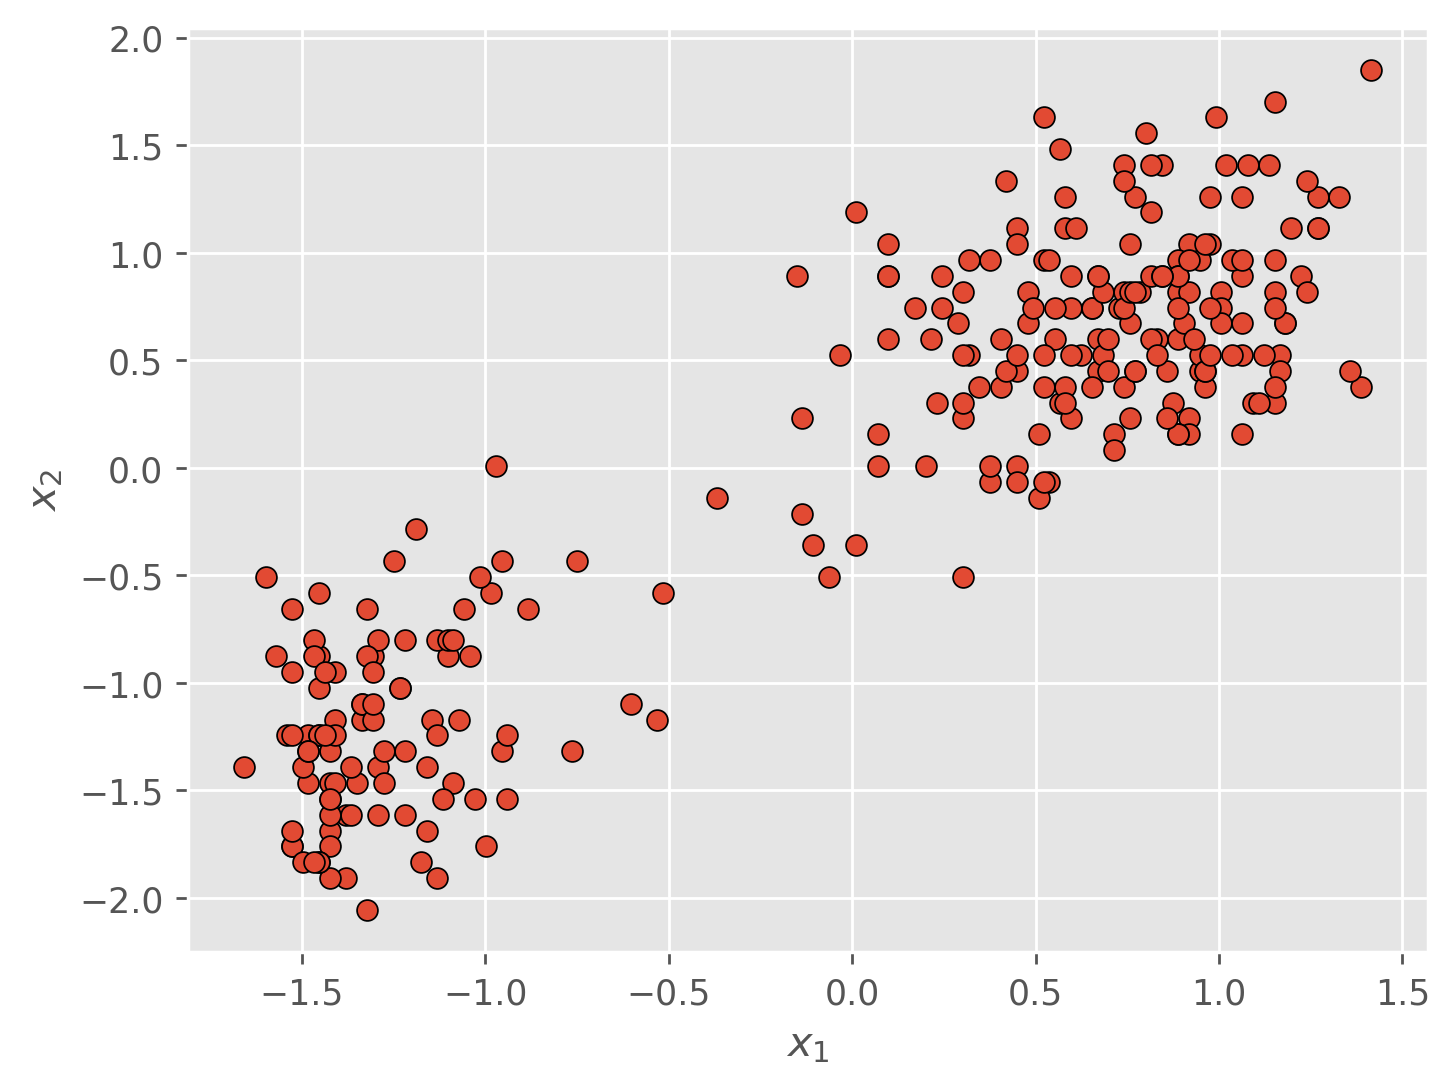

In [55]:
dataset = pd.read_csv('/Users/jeremyschroeter/Desktop/jeremyschroeter.github.io/assets/datasets/old_faithful.tsv', delimiter='\t')
dataset = StandardScaler().fit_transform(dataset)
plt.scatter(dataset[:, 0], dataset[:, 1], edgecolors='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


In [56]:
def fit(X, K=2):

    def J(assignments, mu):
        j = 0
        for k in range(K):
            j += (np.linalg.norm(X[assignments == k] - mu[k], axis=1) ** 2).sum()
        return j
    
    def assign_clusters(mu):
        
        distances = np.zeros(shape=(2, len(X)))
        for k in range(K):
            distances[k] = np.linalg.norm(X - mu[k], axis=1)

        return distances.argmin(axis=0)
    
    def update_mu(assignments, mu):
        new_mu = np.zeros_like(mu)
        for k in range(K):
            new_mu[k] = X[assignments == k].mean()
        
        return new_mu
    
    mu_updates = []
    assignment_updates = []
    j_scores = []
    
    old_mu = np.array([[1.0, -1.5],
                       [-1.0, 1.5]])
    old_assignments = assign_clusters(old_mu)
    old_j = np.inf
    
    mu_updates.append(old_mu)
    assignment_updates.append(old_assignments)
    j_scores.append(J(old_assignments, old_mu))

    while True:

        new_mu = update_mu(old_assignments, old_mu)
        j_scores.append(J(old_assignments, new_mu))

        new_assignments = assign_clusters(new_mu)
        new_j = J(new_assignments, new_mu)
        j_scores.append(new_j)
        
        if abs(new_j - old_j) < 1e-4:
            break
        
        mu_updates.append(new_mu)
        assignment_updates.append(new_assignments)

        old_mu, old_assignments, old_j = new_mu, new_assignments, new_j
    
    return mu_updates, assignment_updates, j_scores



def plot_kmeans(X, assignments, mu, colors):
    def assign_clusters(X, mu):
        
        distances = np.zeros(shape=(2, len(X)))
        for k in range(2):
            distances[k] = np.linalg.norm(X - mu[k], axis=1)

        return distances.argmin(axis=0)

    xlim = (-1.810616356948504, 1.5687370098736504)
    ylim = (-2.2510795008932294, 2.0451748671700867)

    current_colors = [colors[k] for k in assignments]
    x_min, x_max = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
    y_min, y_max = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    points = np.column_stack((xx.ravel(), yy.ravel()))
    assignments = assign_clusters(points, mu)
    assignments = assignments.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111)


    ax.contour(xx, yy, assignments, levels=1, colors='black')
    ax.scatter(X[:, 0], X[:, 1], c=current_colors, edgecolors='black')
    ax.scatter(mu[:, 0], mu[:, 1], c=colors, edgecolors='black', marker='X', s=50)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    return ax


In [57]:
mu, assignments, j_scores = fit(dataset)

In [58]:
len(mu)

6

In [59]:
updates = [
    (assignments[0], mu[0]),
    (assignments[0], mu[1]),
    (assignments[1], mu[1]),
    (assignments[1], mu[2]),
    (assignments[2], mu[2]),
    (assignments[2], mu[3]),
    (assignments[3], mu[3]),
    (assignments[3], mu[4]),
]

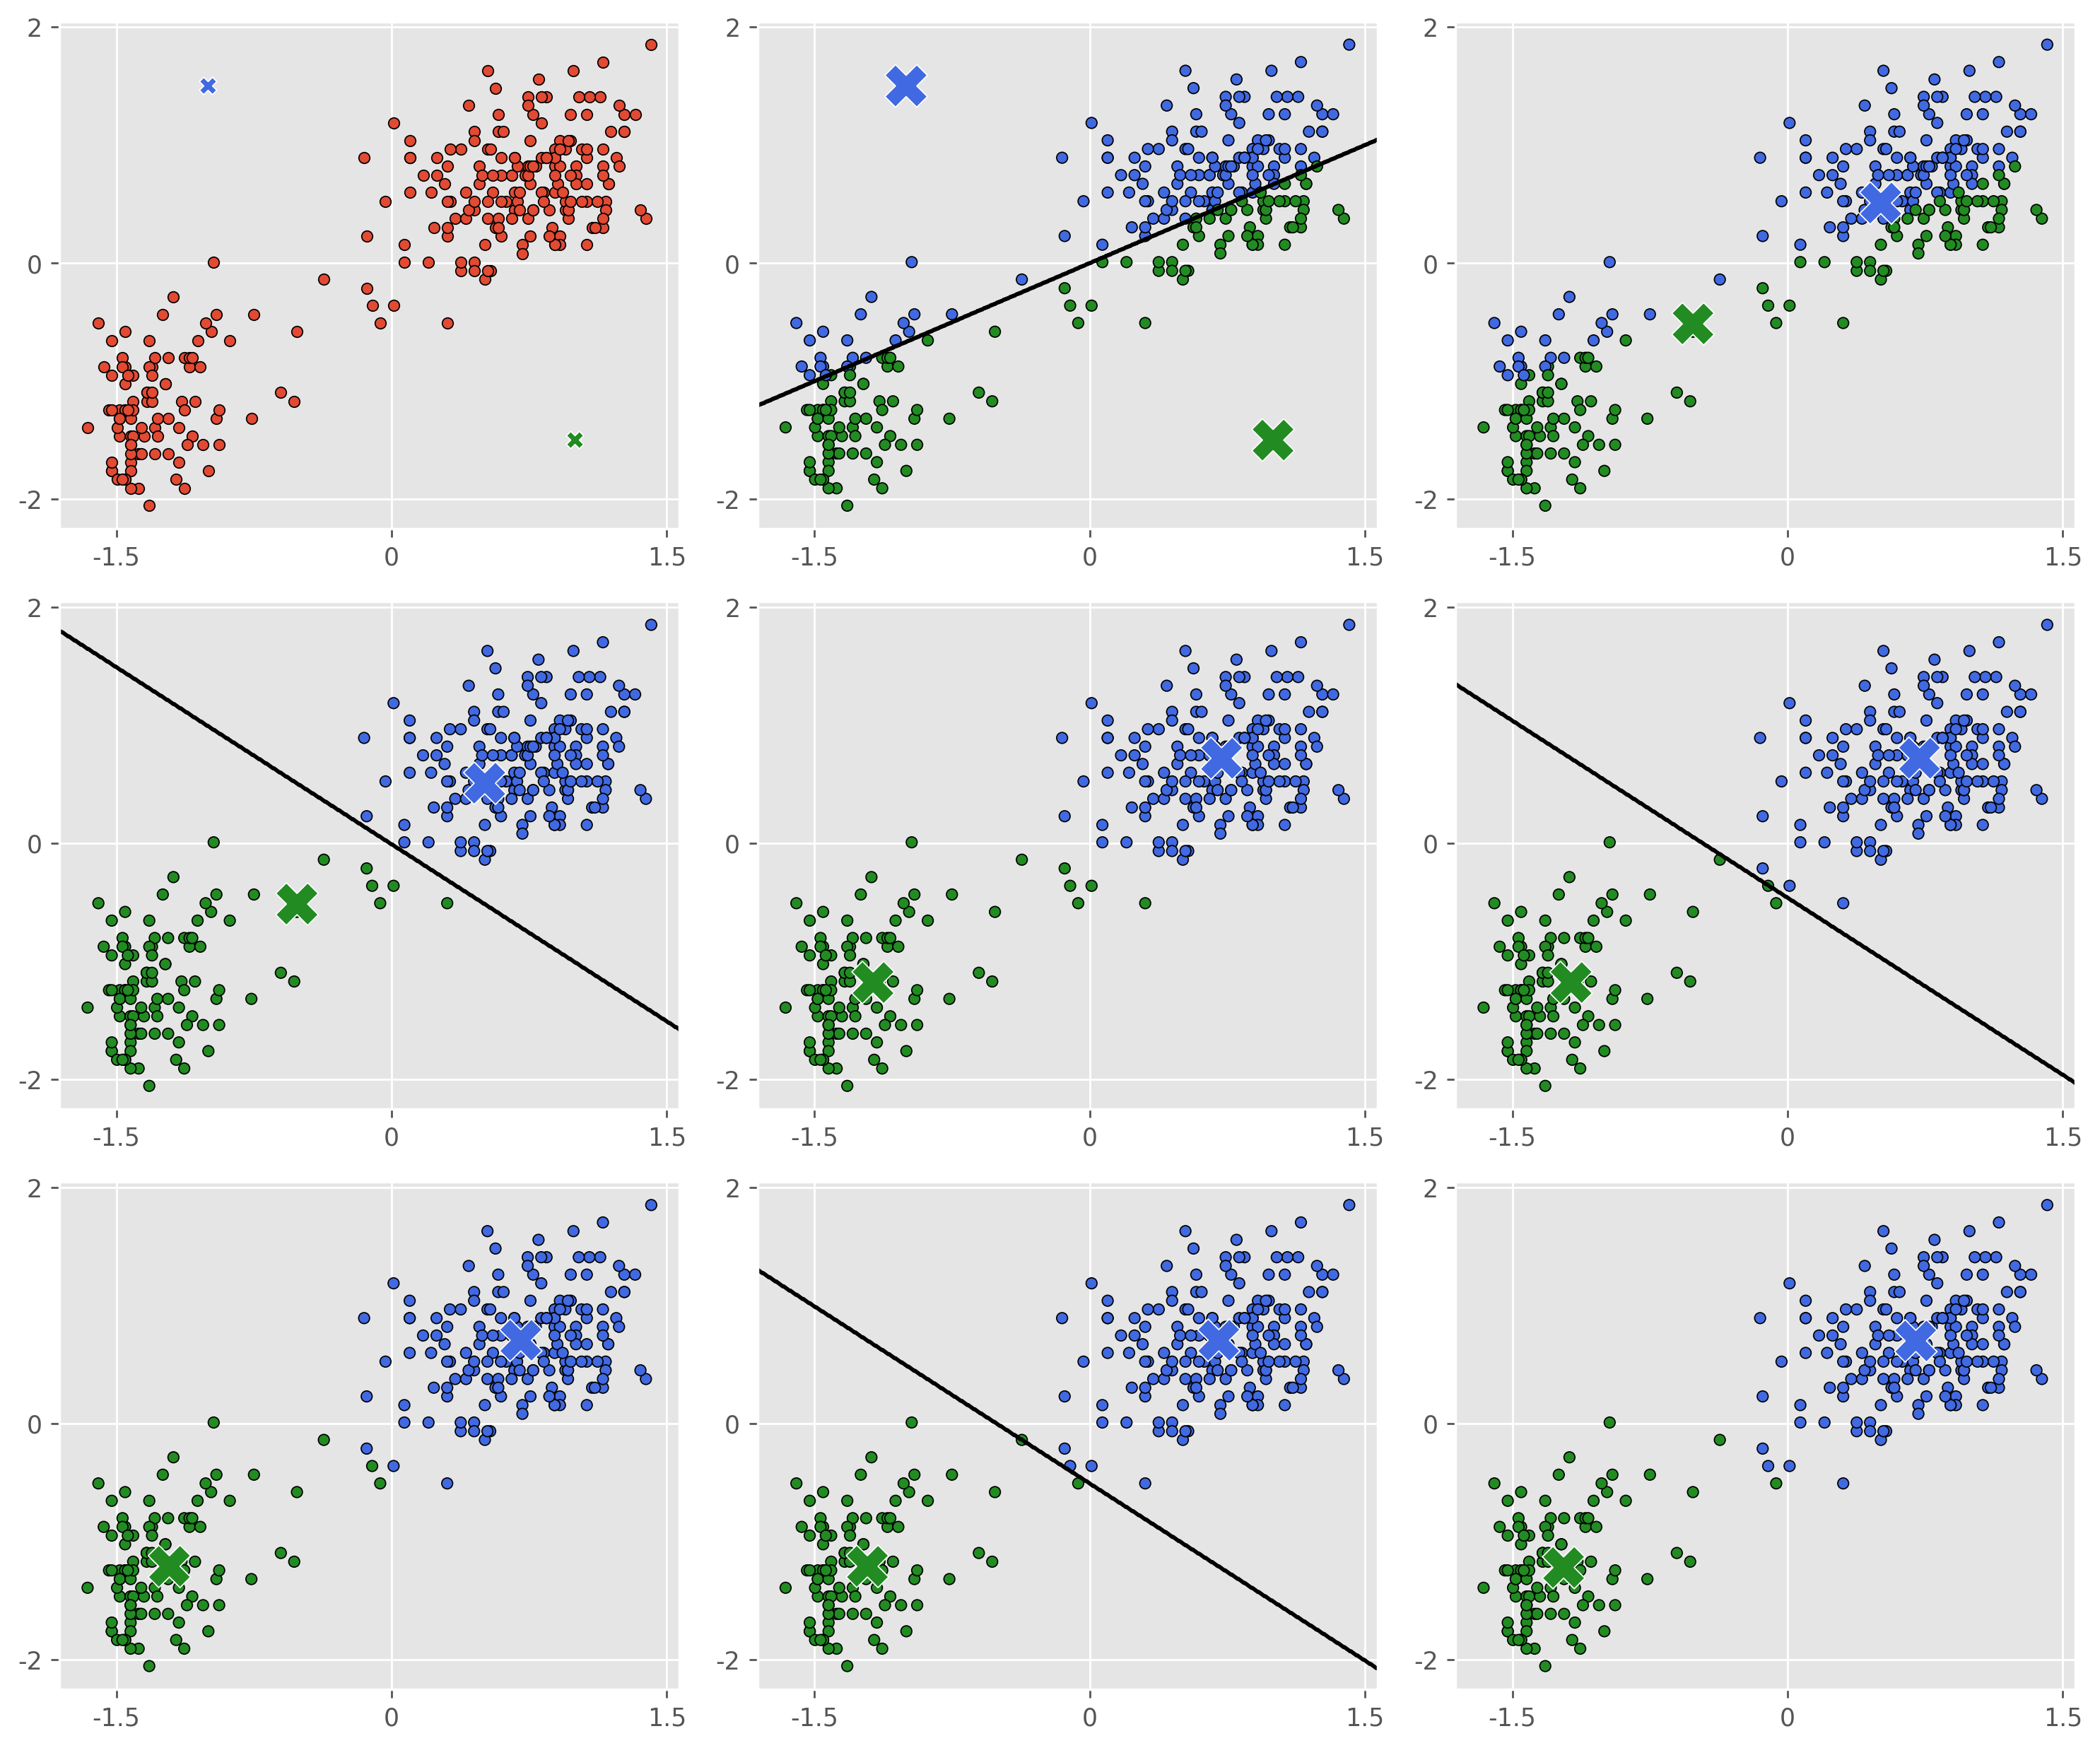

In [60]:
def assign_clusters(X, mu):  
    distances = np.zeros(shape=(2, len(X)))
    for k in range(2):
        distances[k] = np.linalg.norm(X - mu[k], axis=1)
    return distances.argmin(0)

fig, ax = plt.subplots(3, 3, figsize=(12, 10))
colors = ['forestgreen', 'royalblue']


xticks = [-1.5, 0, 1.5]
yticks = [-2, 0, 2]

xlim = (-1.810616356948504, 1.5687370098736504)
ylim = (-2.2510795008932294, 2.0451748671700867)
ax[0, 0].scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', s=20)
ax[0, 0].scatter(mu[0][:, 0], mu[0][:, 1], c=colors, edgecolors='white', marker='X', s=50)

for idx, axis in enumerate(ax.flat[1:]):
    z, mean = updates[idx]
    
    current_colors = [colors[k] for k in z]

    axis.scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', s=20, c=current_colors)

    axis.scatter(mean[:, 0], mean[:, 1], c=colors, edgecolors='white', marker='X', s=300)

    if idx % 2 == 0:
        x_min, x_max = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
        y_min, y_max = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

        points = np.column_stack((xx.ravel(), yy.ravel()))
        assignments = assign_clusters(points, mean)
        assignments = assignments.reshape(xx.shape)

        axis.contour(xx, yy, assignments, levels=1, colors='black')
    






for idx, i in enumerate(ax.flat):
    i.set_xticks(xticks, xticks)
    i.set_yticks(yticks, yticks)
    i.set_xlim(xlim)
    i.set_ylim(ylim)




fig.tight_layout()

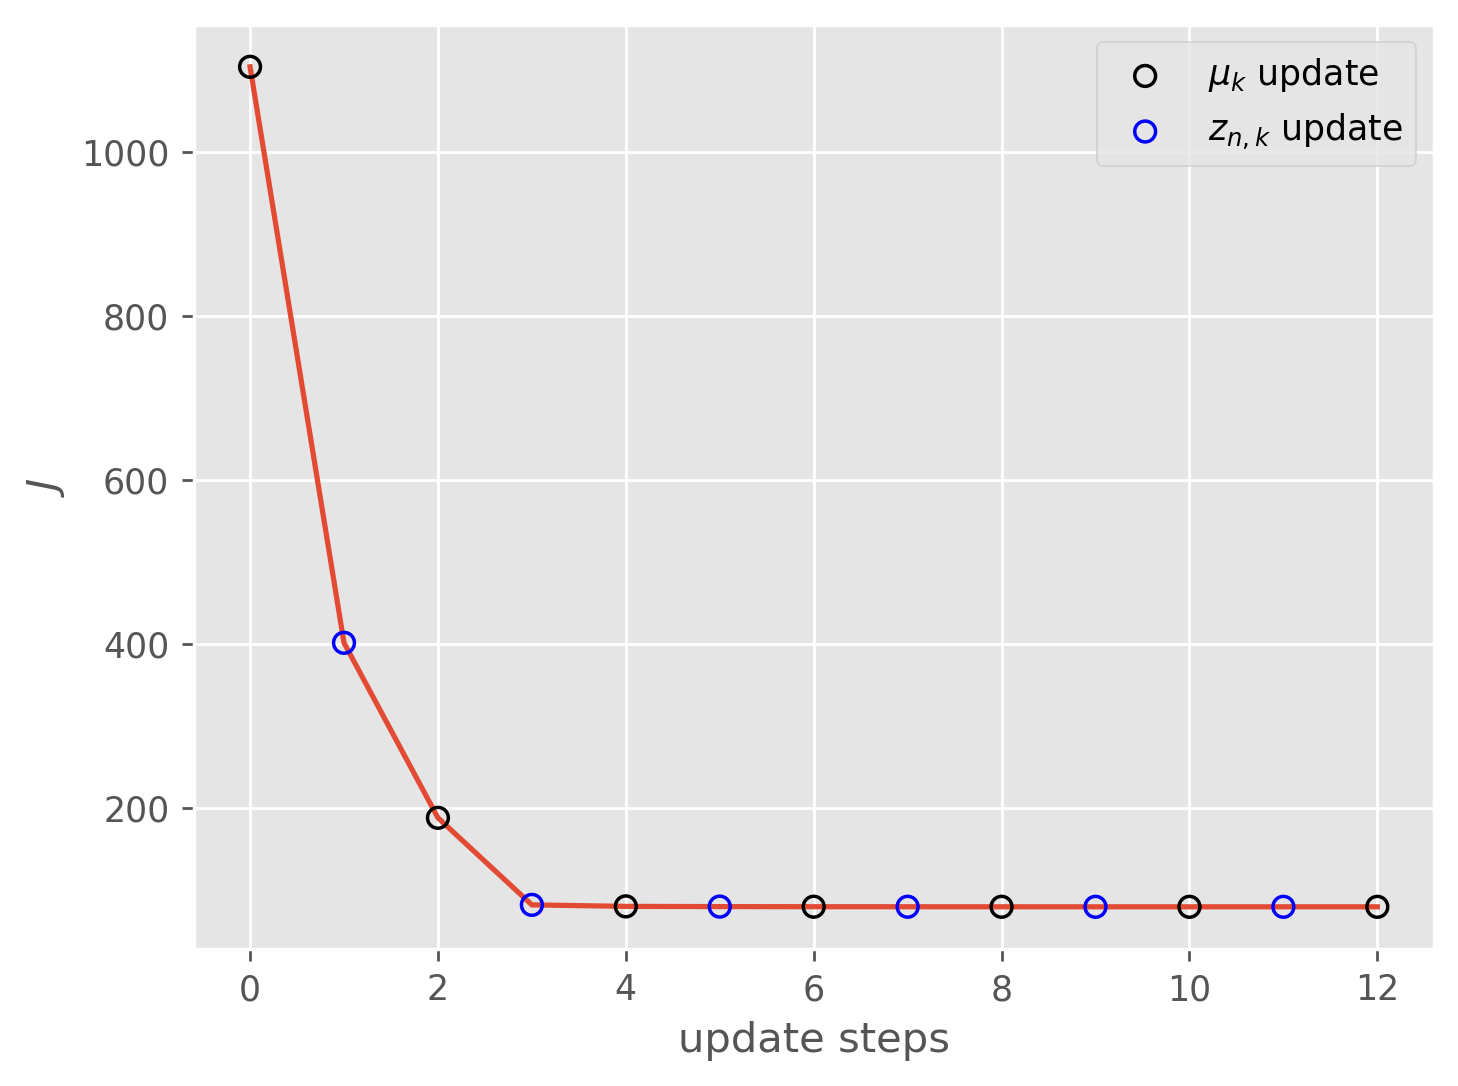

In [47]:

colors = ['black', 'blue', 'black', 'blue', 'black', 'blue', 'black', 'blue', 'black', 'blue', 'black', 'blue', 'black']
plt.scatter(0, j_scores[0], facecolors='none', edgecolors='black', lw=1, zorder=10, label='$\mu_k$ update')
plt.scatter(1, j_scores[1], facecolors='none', edgecolors='blue', lw=1, zorder=10, label='$z_{n, k}$ update')

plt.scatter(np.arange(2, 13), j_scores[2:], facecolors='none', edgecolors=colors[2:], lw=1, zorder=10)
plt.plot(j_scores)
plt.ylabel('$J$')
plt.xlabel('update steps')
plt.legend()


In [48]:
from scipy.stats import multivariate_normal

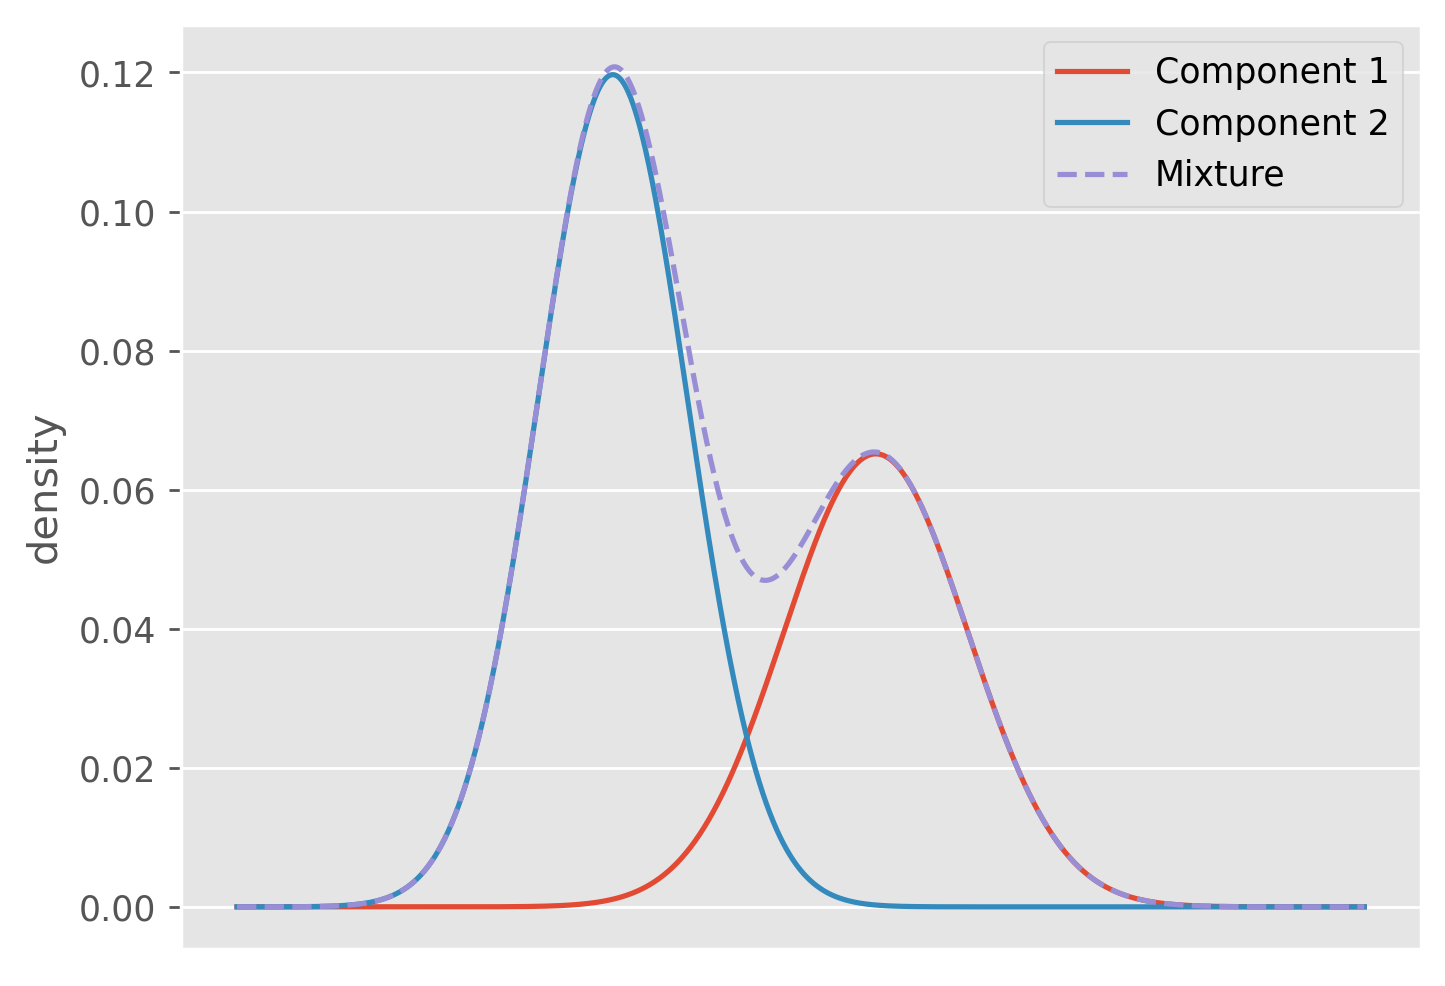

In [49]:
x = np.linspace(-10, 20, 1000)

N_1 = multivariate_normal(7, 6)
N_2 = multivariate_normal(0, 4)

y1 = N_1.pdf(x) * 0.4
y2 = N_2.pdf(x) * 0.6
plt.plot(x, y1, label='Component 1')
plt.plot(x, y2, label='Component 2')

plt.plot(x,  y1 +  y2, ls='--', label='Mixture')
# plt.xlabel('x')
plt.xticks([], [])
plt.ylabel('density')
plt.legend()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

def create_colormap(color1, color2, name='custom_colormap'):
    """
    Create a colormap that transitions linearly between two specified colors.

    Args:
    color1 (str or tuple): The first color in the colormap.
    color2 (str or tuple): The second color in the colormap.
    name (str): The name of the colormap.

    Returns:
    LinearSegmentedColormap: The resulting colormap.
    """
    # Define the colors for the colormap
    colors = [color1, color2]
    # Create a colormap
    cmap = LinearSegmentedColormap.from_list(name, colors)
    return cmap

In [374]:
custom_colormap = create_colormap('forestgreen', 'royalblue')

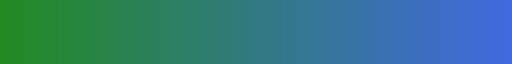

In [375]:
custom_colormap

In [582]:
from scipy.stats import multivariate_normal
outer = np.outer
def fit_gmm(X, K=2):

    def compute_LL():
        log_probs = np.zeros((len(X), K))
        for k in range(K):
            log_probs[:, k] += multivariate_normal(mu[:, k], sigma[..., k]).pdf(X) * pi[k]
        log_probs = np.log(log_probs.sum(1))
        return log_probs.sum()
    
    def compute_gamma():
        gamma = np.zeros((len(X), K))
        for k in range(K):
            gamma[:, k] = multivariate_normal(mu[:, k], sigma[..., k]).pdf(X) * pi[k]
        gamma /= gamma.sum(axis=1, keepdims=True)
        return gamma

    def compute_Nk():
        return np.sum(gamma, axis=0)

    def compute_mu():
        mu = np.zeros((2, K))
        for k in range(K):
            mu[:, k] = (gamma[:, k, np.newaxis] * X).sum(axis=0) / N_k[k]
        return mu

    
    def compute_sigma():
        sigma = np.zeros((2, 2, K))
        for k in range(K):
            for n in range(len(X)):
                sigma[..., k] += (gamma[n, k] * outer(X[n] - mu[:, k], X[n] - mu[:, k])) / N_k[k]
        return sigma

    def compute_pi():
        return N_k / len(X)
    
    
    LLs, mus, sigmas, pis, gammas = [], [], [], [], []
    mu = np.array([[1.2, -1.5],
                   [-2.0, 1.5]])
    sigma = np.zeros((2, 2, 2))
    sigma[..., 0] = np.eye(2) * 0.1
    sigma[..., 1] = np.eye(2) * 0.1
    pi = np.array([0.5, 0.5])
    
    mus.append(mu)
    sigmas.append(sigma)
    pis.append(pi)
    
    LL_old = -np.inf
    
    while True:
        gamma = compute_gamma()
        N_k = compute_Nk()
        mu = compute_mu()
        sigma = compute_sigma()
        pi = compute_pi()
        LL_new = compute_LL()

        mus.append(mu)
        sigmas.append(sigma)
        pis.append(pi)
        gammas.append(gamma)
        LLs.append(LL_new)
        if LL_new - LL_old < 1e-9:
            gammas.append(compute_gamma())
            break
        else:
            LL_old = LL_new

    return mus, sigmas, pis, gammas, LLs



In [583]:
mus, sigmas, pis, gammas, LLs = fit_gmm(dataset)

In [588]:
len(mus)

39

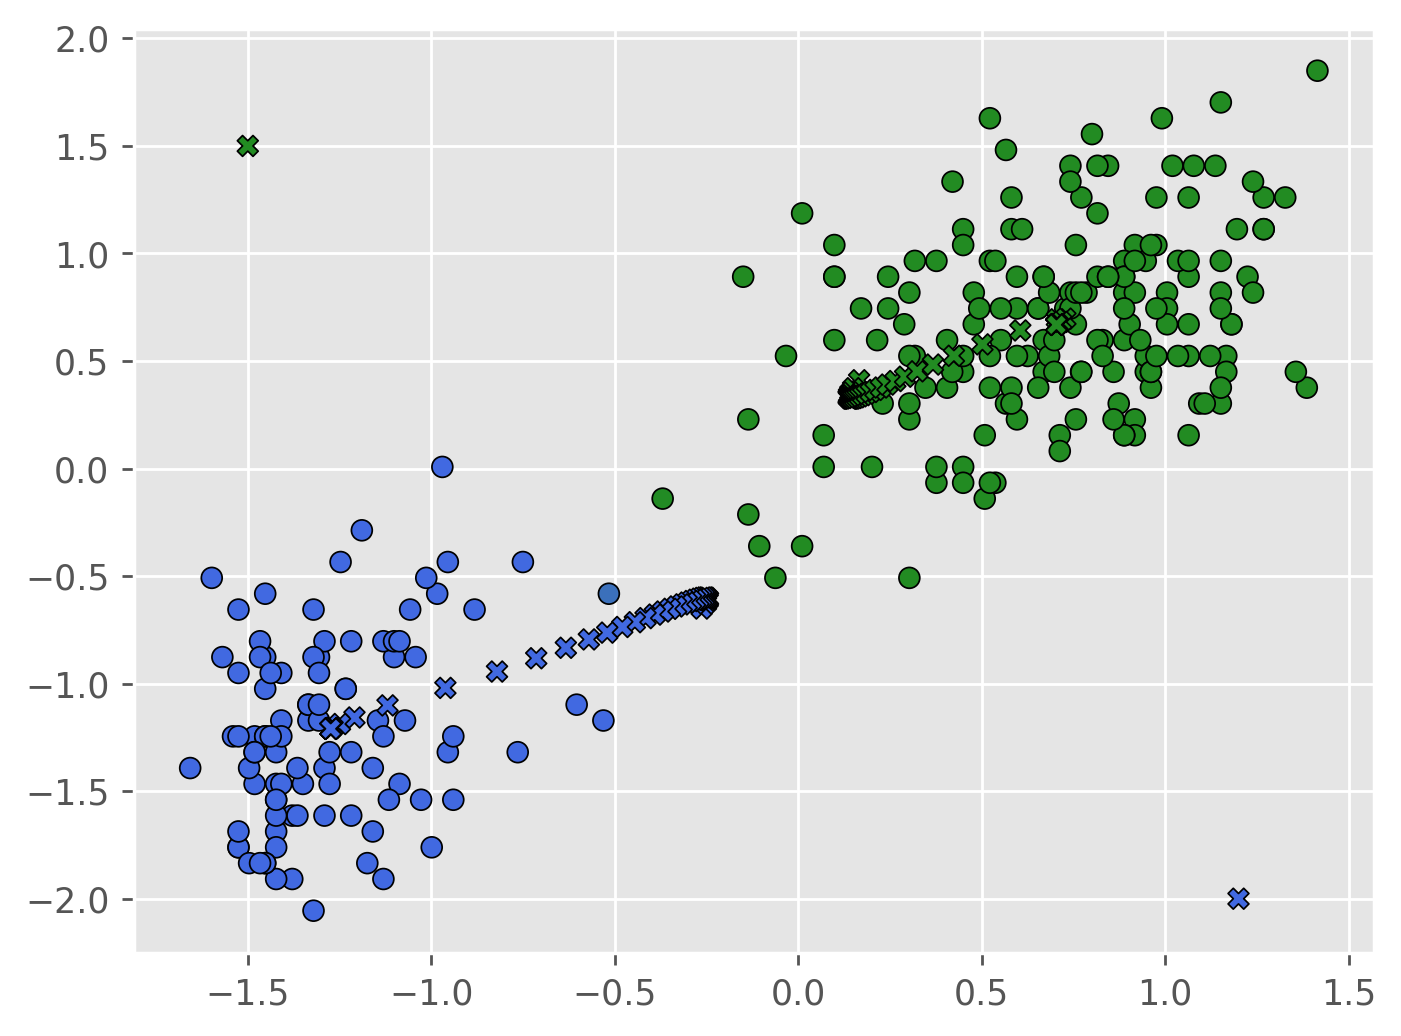

In [587]:
z = gammas[-1][:, 0]
norm = Normalize(z.min(), z.max())
colors = custom_colormap(norm(z))
iteration = -1
plt.scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', c=colors)
for iteration in range(len(mus)):
    plt.scatter(mus[iteration][0, :], mus[iteration][1, :], edgecolors='black', marker='X', c=['royalblue', 'forestgreen'])

In [591]:
updates = [0, 1, 15, 25, 27, -1]
updates = [
    (mus[i], sigmas[i], gammas[i]) for i in updates
]

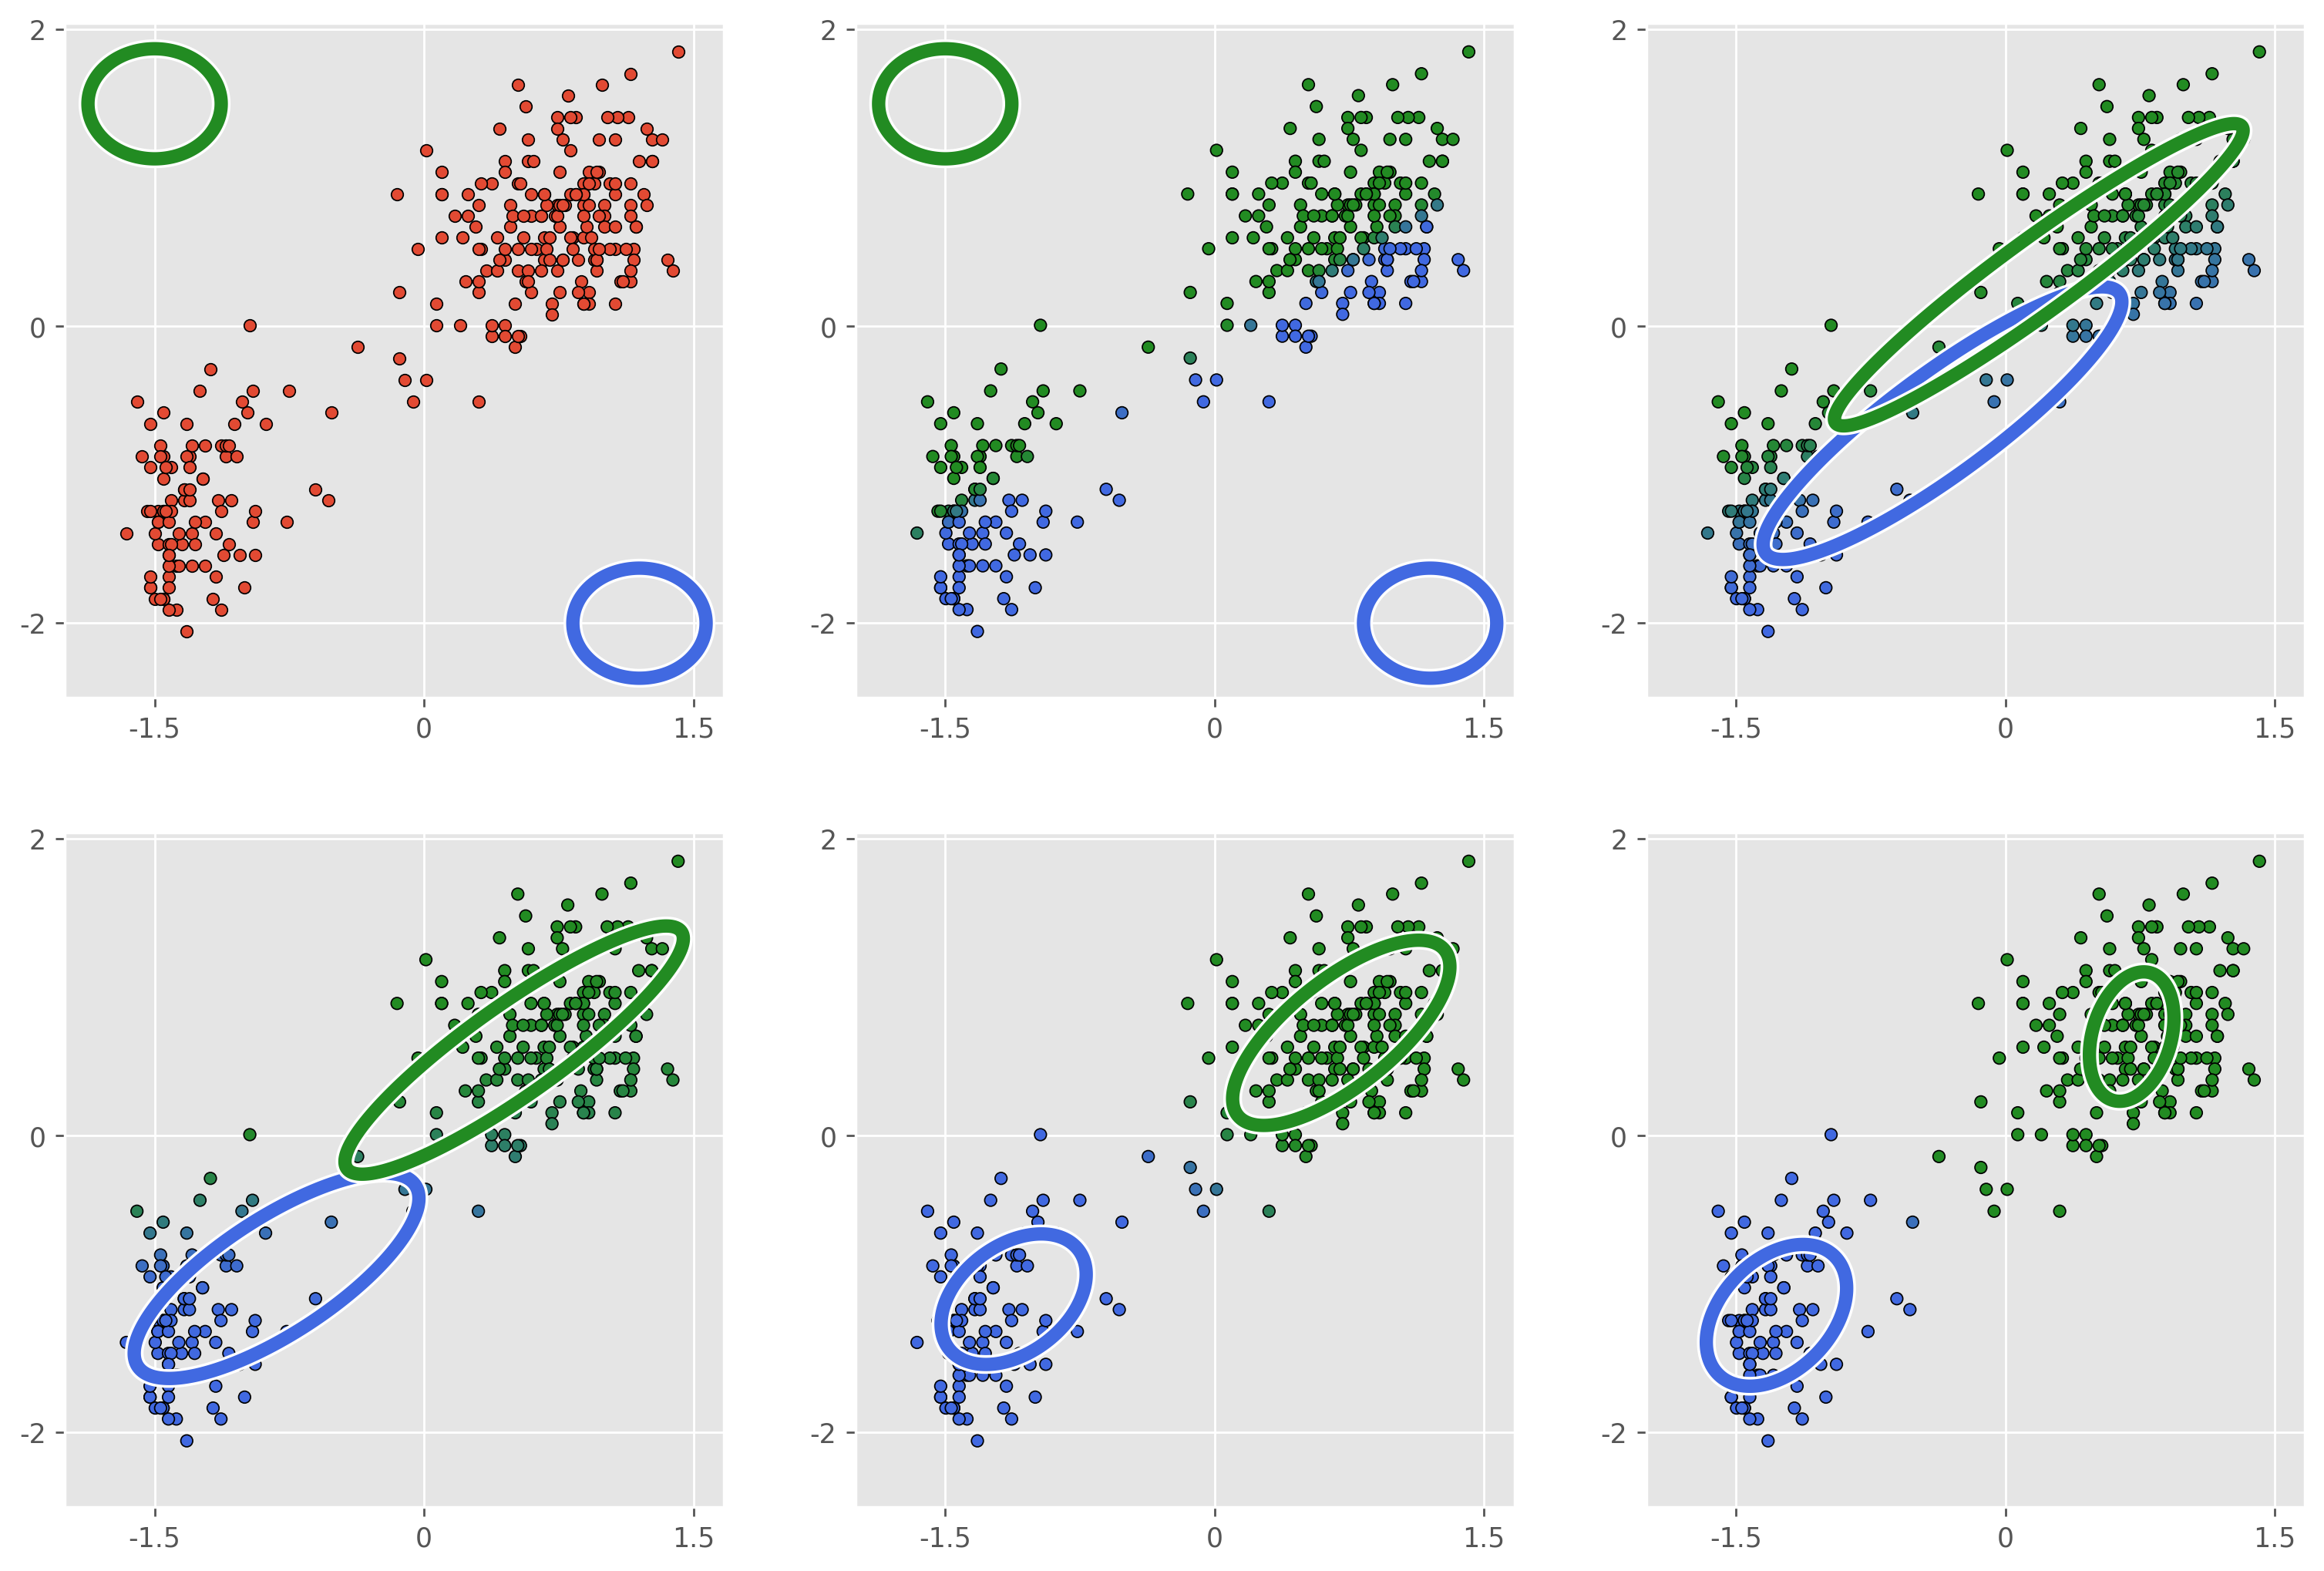

In [606]:

x_min, x_max = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
y_min, y_max = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
points = np.column_stack((xx.ravel(), yy.ravel()))
xlim = (-2, 1.6687370098736504)
ylim = (-2.5, 2.0451748671700867)
xticks = [-1.5, 0, 1.5]
yticks = [-2, 0, 2]


fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i in range(3):
    mu, sigma, gamma = updates[i]

    if i == 0:
        ax[0, i].scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', s=20)
        z = multivariate_normal(mu[:, 0], sigma[:, :, 1]).pdf(points)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='royalblue', linewidths=5)

        
        z = multivariate_normal(mu[:, 1], sigma[:, :, 0]).pdf(points)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='forestgreen', linewidths=5)

        mu, sigma, gamma = updates[i + 3]

        z = gamma[:, 0]
        norm = Normalize(z.min(), z.max())
        colors = custom_colormap(norm(z))
        ax[1, i].scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', c=colors, s=20)
        z = multivariate_normal(mu[:, 0], sigma[:, :, 1]).pdf(points)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='royalblue', linewidths=5)
        
        z = multivariate_normal(mu[:, 1], sigma[:, :, 0]).pdf(points)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='forestgreen', linewidths=5)
    
    elif i == 1:
        mu, sigma, gamma = updates[0]
        z = gamma[:, 0]
        norm = Normalize(z.min(), z.max())
        colors = custom_colormap(norm(z))
        ax[0, i].scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', c=colors, s=20)
        z = multivariate_normal(mu[:, 0], sigma[:, :, 1]).pdf(points)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='royalblue', linewidths=5)
        
        z = multivariate_normal(mu[:, 1], sigma[:, :, 0]).pdf(points)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='forestgreen', linewidths=5)

        mu, sigma, gamma = updates[i + 3]

        z = gamma[:, 0]
        norm = Normalize(z.min(), z.max())
        colors = custom_colormap(norm(z))
        ax[1, i].scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', c=colors, s=20)
        z = multivariate_normal(mu[:, 0], sigma[:, :, 1]).pdf(points)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='royalblue', linewidths=5)
        
        z = multivariate_normal(mu[:, 1], sigma[:, :, 0]).pdf(points)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='forestgreen', linewidths=5)


    
    else:
        z = gamma[:, 0]
        norm = Normalize(z.min(), z.max())
        colors = custom_colormap(norm(z))
        ax[0, i].scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', c=colors, s=20)
        z = multivariate_normal(mu[:, 0], sigma[:, :, 1]).pdf(points)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='royalblue', linewidths=5)
        
        z = multivariate_normal(mu[:, 1], sigma[:, :, 0]).pdf(points)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[0, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='forestgreen', linewidths=5)

        mu, sigma, gamma = updates[i + 3]

        z = gamma[:, 0]
        norm = Normalize(z.min(), z.max())
        colors = custom_colormap(norm(z))
        ax[1, i].scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', c=colors, s=20)
        z = multivariate_normal(mu[:, 0], sigma[:, :, 1]).pdf(points)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='royalblue', linewidths=5)
        
        z = multivariate_normal(mu[:, 1], sigma[:, :, 0]).pdf(points)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='white', linewidths=7)
        ax[1, i].contour(xx, yy, z.reshape(xx.shape), levels=1, colors='forestgreen', linewidths=5)

        
        

for idx, i in enumerate(ax.flat):
    i.set_xticks(xticks, xticks)
    i.set_yticks(yticks, yticks)
    i.set_xlim(xlim)
    i.set_ylim(ylim)
   

    # z = multivariate_normal(mus[-1][:, 1], sigmas[-1][:, :, 0]).pdf(points)


    # plt.contour(xx, yy, z.reshape(xx.shape), levels=3, colors='white', linewidths=5)
    # plt.contour(xx, yy, z.reshape(xx.shape), levels=3, colors='forestgreen')
    # z = gammas[-1][:, 0]
    # norm = Normalize(z.min(), z.max())
    # colors = custom_colormap(norm(z))
    # plt.scatter(dataset[:, 0], dataset[:, 1], edgecolors='black', c=colors)



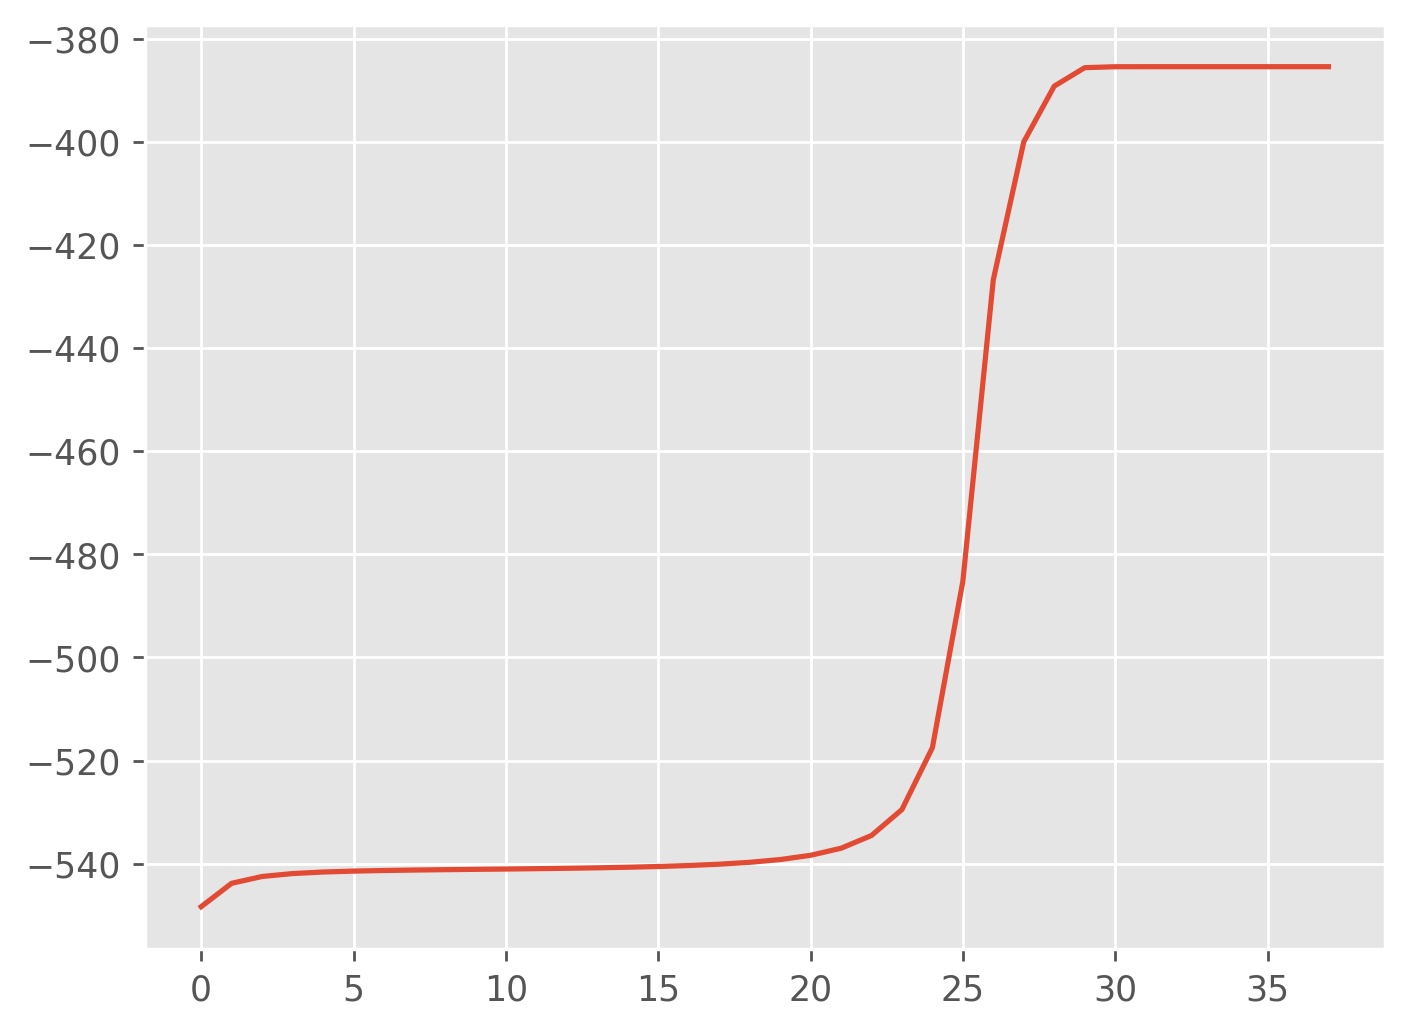

In [607]:
plt.plot(LLs)

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    fit_gmm()